In [1]:
import pandas
import numpy
import datetime

In [2]:
df = pandas.read_csv('openpv_all.csv',engine='python')


In [3]:
df['date'] = pandas.to_datetime(df['date_installed']).apply(lambda dt: dt.replace(day=15))

In [4]:
df['year'] = df['date_installed'].str.slice(-4).astype(float)
df['count'] = 1
df['rebates']=df['rebate'].str.strip('$-').str.replace(',','').astype(float)
df['pct_reported_prod'] = 100*df.reported_annual_energy_prod/df.annual_PV_prod
df['install_type'] = df['install_type'].str.lower().str.split().str[0]

In [5]:
rdf = df[(df['install_type']=='residential')]
cdf = df[(df['install_type']=='commercial')]

In [6]:
[(col,len(df[col].dropna())) for col in df]

[('state', 1020671),
 ('date_installed', 1020666),
 ('incentive_prog_names', 797958),
 ('type', 1020666),
 ('size_kw', 1020666),
 ('appraised', 224036),
 ('zipcode', 1020666),
 ('install_type', 978090),
 ('installer', 702607),
 ('cost_per_watt', 763089),
 ('cost', 763250),
 ('lbnl_tts_version_year', 797958),
 ('lbnl_tts', 797958),
 ('city', 799104),
 ('utility_clean', 792720),
 ('tech_1', 580919),
 ('model1_clean', 580919),
 ('county', 998652),
 ('annual_PV_prod', 780969),
 ('annual_insolation', 780969),
 ('rebate', 386698),
 ('sales_tax_cost', 355309),
 ('tilt1', 383365),
 ('tracking_type', 526058),
 ('azimuth1', 363281),
 ('manuf2_clean', 231607),
 ('manuf3_clean', 209653),
 ('manuf1_clean', 201121),
 ('inv_man_clean', 49933),
 ('reported_annual_energy_prod', 204429),
 ('incentivetype', 0),
 ('year_app_implied', 0),
 ('year', 1020666),
 ('npv_fit_real', 0),
 ('application_implied', 0),
 ('npv_pbi_real', 0),
 ('other_incentive', 0),
 ('appraised_cluster', 0),
 ('inflation', 0),
 ('oth

In [7]:
df['utility_clean'].value_counts()

Pacific Gas & Electric Company               215183
Southern California Edison                   164476
San Diego Gas & Electric Company              70941
National Grid                                 42328
Arizona Public Service                        40647
Los Angeles Department of Water & Power       19757
PSEG Long Island                              18015
NSTAR (DBA EverSource)                        16698
JCP&L                                         16438
PSE&G BPU                                     15883
Salt River Project                            15275
Connecticut Light and Power                   13391
Nevada Power                                  12766
Sacramento Municipal Utility District         11698
Tucson Electric Power                         10921
AC Electric                                    8948
Consolidated Edison                            5894
Baltimore Gas & Electric Co                    5212
Austin Energy                                  4688
Public Servi

In [8]:
df[(df['reported_annual_energy_prod']>0.)]['rebates'].value_counts()

2000.0000      5292
500.0000       4459
250.0000       2229
1250.0000      1930
3750.0000      1206
4000.0000      1147
2500.0000       929
10500.0000      909
17500.0000      833
7500.0000       781
3250.0000       751
6000.0000       684
13500.0000      672
2400.0000       595
5000.0000       508
6750.0000       452
9800.0000       413
12500.0000      384
12250.0000      372
15000.0000      351
4500.0000       340
10750.0000      332
1500.0000       326
22500.0000      292
4250.0000       289
2250.0000       276
1200.0000       273
8000.0000       271
3000.0000       265
1800.0000       213
               ... 
11161.0000        1
117410.0000       1
1769.0600         1
29353.0000        1
24328.0000        1
21161.2500        1
8452.4200         1
13030.1200        1
27796.7734        1
10573.0000        1
21468.9300        1
14739.6600        1
7288.1600         1
9610.0400         1
6008.0000         1
42298.0000        1
2683.9600         1
23436.0000        1
38437.4100        1


In [9]:
ahist=df[(df['state']=='CA')]['year'].hist(bins=[x for x in range(1999,2016)])
ahist=rdf[(rdf['state']=='CA')]['year'].hist(bins=[x for x in range(1999,2016)])
ahist=cdf[(cdf['state']=='CA')]['year'].hist(bins=[x for x in range(1999,2016)])


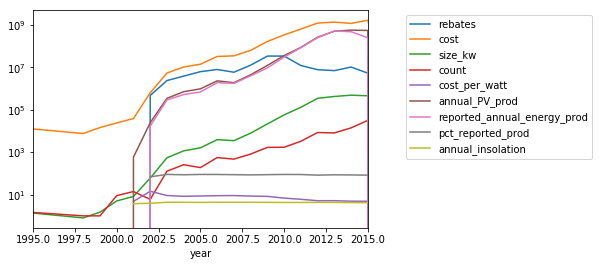

In [10]:
this_state = df['state'].value_counts().index[2]
ax1=df[(df['state']==this_state)].groupby(['year']).sum()['rebates'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).sum()['cost'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).sum()['size_kw'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).sum()['count'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).mean()['cost_per_watt'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).sum()['annual_PV_prod'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).sum()['reported_annual_energy_prod'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).mean()['pct_reported_prod'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).mean()['annual_insolation'].plot(logy=True,xlim=(1995,2015))
ax1.legend(bbox_to_anchor=(1.1, 1.0))

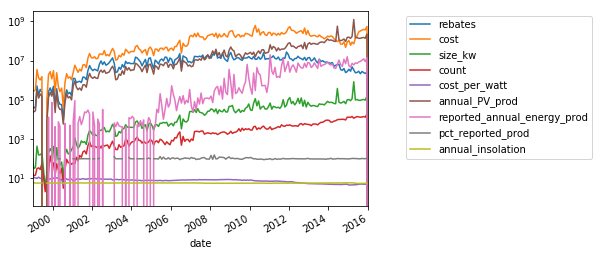

In [11]:
this_state = df['state'].value_counts().index[0]
ax1=df[(df['state']==this_state)].groupby(['date']).sum()['rebates'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).sum()['cost'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).sum()['size_kw'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).sum()['count'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).mean()['cost_per_watt'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).sum()['annual_PV_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).sum()['reported_annual_energy_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).mean()['pct_reported_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).mean()['annual_insolation'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1.legend(bbox_to_anchor=(1.1, 1.0))

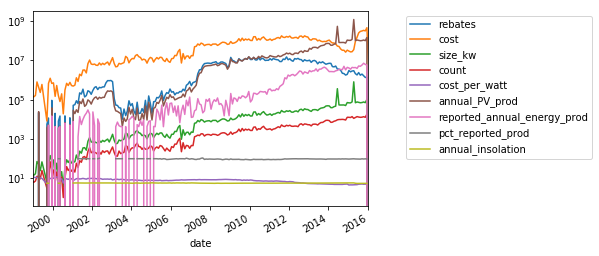

In [12]:
this_state = rdf['state'].value_counts().index[0]
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).sum()['rebates'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).sum()['cost'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).sum()['size_kw'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).sum()['count'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).mean()['cost_per_watt'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).sum()['annual_PV_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).sum()['reported_annual_energy_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).mean()['pct_reported_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).mean()['annual_insolation'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1.legend(bbox_to_anchor=(1.1, 1.0))

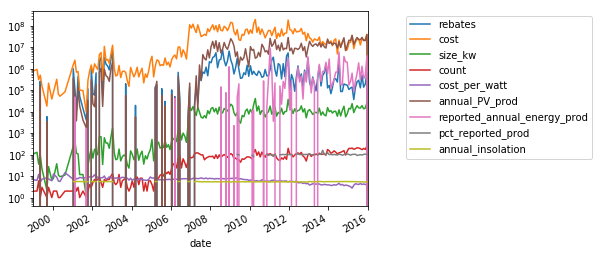

In [13]:
this_state = cdf['state'].value_counts().index[0]
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).sum()['rebates'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).sum()['cost'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).sum()['size_kw'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).sum()['count'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).mean()['cost_per_watt'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).sum()['annual_PV_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).sum()['reported_annual_energy_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).mean()['pct_reported_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).mean()['annual_insolation'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1.legend(bbox_to_anchor=(1.1, 1.0))

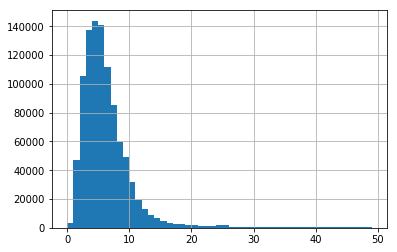

In [14]:
df['size_kw'].hist(bins=range(0,50,1))



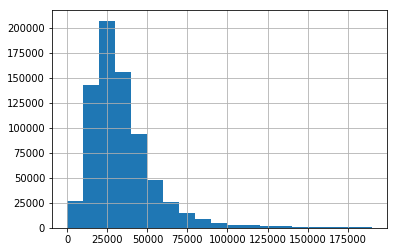

In [15]:
df['cost'].hist(bins = range(0,200000,10000))

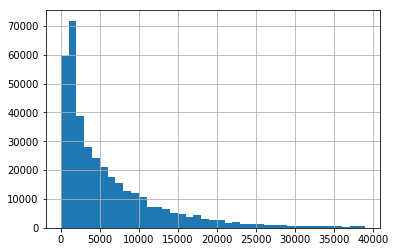

In [16]:
df['rebates'].dropna().hist(bins = range(0,40000,1000))

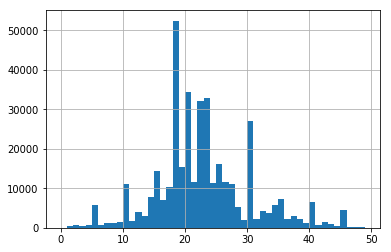

In [17]:
df['tilt1'].dropna().hist(bins=range(0,50,1))

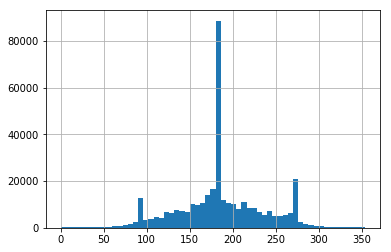

In [18]:
df['azimuth1'].hist(bins=range(0,360,6))